In [1]:
import pandas as pd
import numpy as np
import scipy.stats as stats

In [2]:
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (15,10)

In [3]:
import src.gas as g

In [4]:
# FIRST QUESTION: DOES A REINVESTMENT STRATEGY MAKE SENSE, GIVEN THE RELATIVE GAS/FEES?

In [5]:
gas=g.getHistorical()

In [6]:
gas

,date,wei,ETHUSDT,gasUSDT,tx,reinvest
0,2017-08-17,29045025650,302.00,0.000009,3.070059,6.140118
1,2017-08-18,44653492844,293.96,0.000013,4.594219,9.188439
2,2017-08-19,25853813413,290.91,0.000008,2.632397,5.264793
3,2017-08-20,22972240493,299.10,0.000007,2.404849,4.809698
4,2017-08-21,23061643547,323.29,0.000007,2.609460,5.218919
...,...,...,...,...,...,...
1889,2022-10-19,33130272753,1285.09,0.000043,14.901384,29.802768
1890,2022-10-20,35367998733,1282.57,0.000045,15.876677,31.753354
1891,2022-10-21,34341965708,1299.75,0.000045,15.622589,31.245179
1892,2022-10-22,21906854720,1313.61,0.000029,10.071972,20.143944


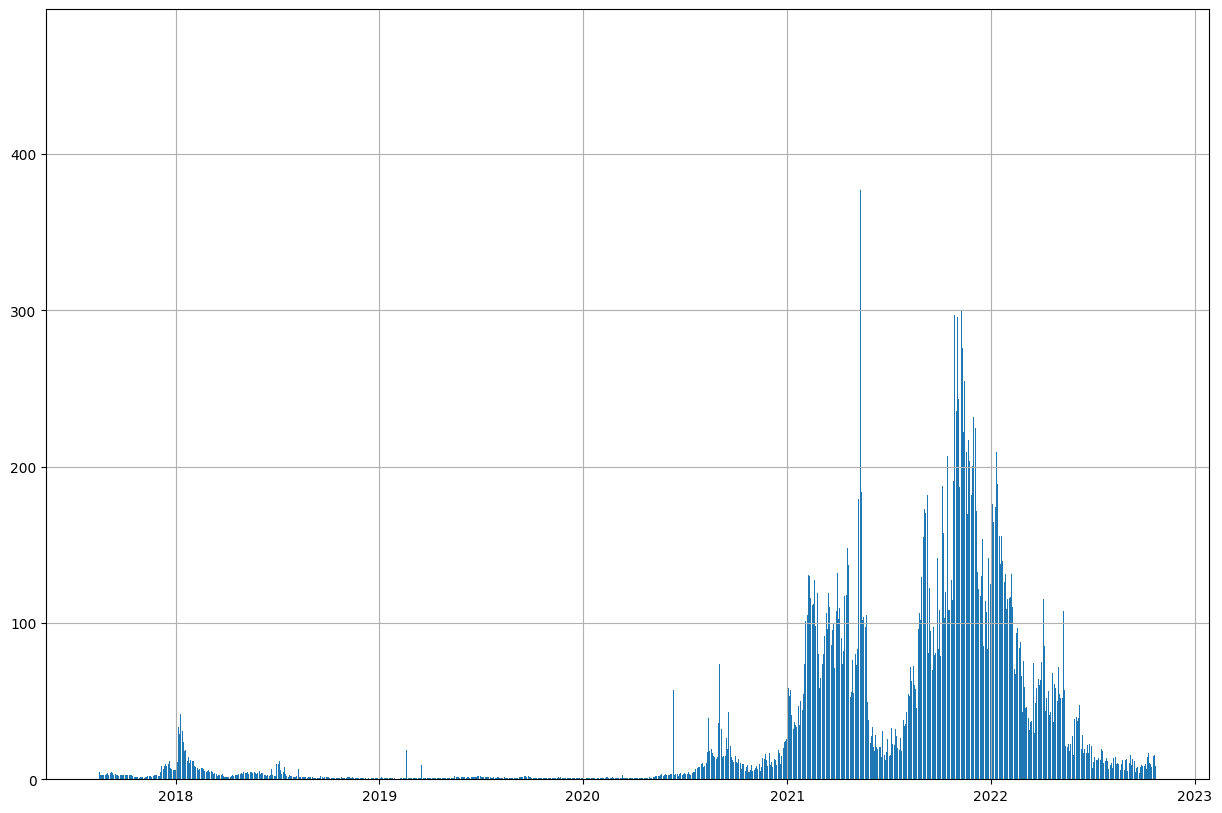

In [7]:
plt.bar(gas.date,gas.tx)
_=plt.grid()

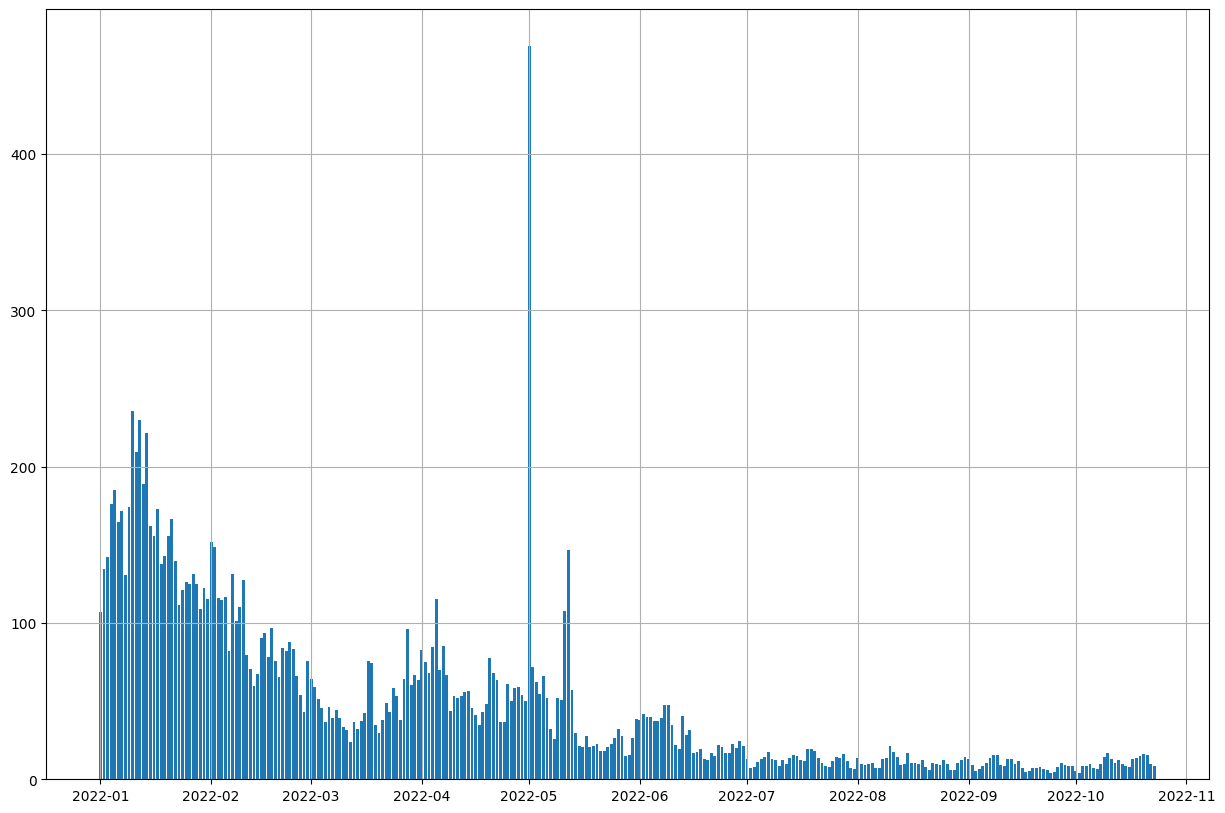

In [8]:
gas2022=gas[gas.date>=pd.Timestamp(2022,1,1)]
plt.bar(gas2022.date,gas2022.tx)
_=plt.grid()

In [9]:
lp_data=pd.read_csv('../data/pool_data.csv',parse_dates=['date'])

In [10]:
lp_data

,date,tvlUSD,volumeUSD,feesUSD,pool_id,pool_name
0,2021-05-24,403892.931715,1.560326e+05,78.016302,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
1,2021-05-25,627333.528404,1.641681e+06,820.840475,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
2,2021-05-26,641104.310366,1.581438e+05,79.071880,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
3,2021-05-27,641137.824278,6.312746e+04,31.563732,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
4,2021-05-28,522950.055411,3.004094e+05,150.204708,0x00cef0386ed94d738c8f8a74e8bfd0376926d24c,BUSD_USDC_05
...,...,...,...,...,...,...
3828,2022-10-21,332852.727774,2.582470e+04,12.912351,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05
3829,2022-10-22,332868.272886,1.235443e+04,6.177214,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05
3830,2022-10-23,332885.856963,2.821563e+04,14.107815,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05
3831,2022-10-24,332908.083203,4.801312e+04,24.006560,0xd5ad5ec825cac700d7deafe3102dc2b6da6d195d,BUSD_USDT_05


In [11]:
start_date=lp_data[lp_data.pool_name=='USDC_USDT_01'].date.min()
pool=lp_data[(lp_data.pool_name=='USDC_USDT_05') & (lp_data.date>=start_date)].reset_index(drop=True)

In [12]:
pool['returns']=pool.feesUSD/pool.tvlUSD

In [13]:
pool

,date,tvlUSD,volumeUSD,feesUSD,pool_id,pool_name,returns
0,2021-11-13,1.234707e+08,1.532803e+07,7664.013660,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000062
1,2021-11-14,1.234439e+08,1.050294e+07,5251.468545,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000043
2,2021-11-15,1.225704e+08,2.973505e+07,14867.525610,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000121
3,2021-11-16,1.171935e+08,4.199508e+07,20997.540933,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000179
4,2021-11-17,5.565470e+07,5.298946e+06,2649.472895,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000048
...,...,...,...,...,...,...,...
342,2022-10-21,2.467383e+07,2.299657e+06,1149.828502,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000047
343,2022-10-22,2.493749e+07,8.260988e+05,413.049380,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000017
344,2022-10-23,3.372380e+07,2.216237e+06,1108.118424,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000033
345,2022-10-24,2.618394e+07,2.538254e+06,1269.126821,0x7858e59e0c01ea06df3af3d20ac7b0003275d4bf,USDC_USDT_05,0.000048


In [14]:
reinvestment_df=gas[['date','reinvest']].merge(pool[['date','returns']])
reinvestment_df['fees_earned']=reinvestment_df.returns*1000000
reinvestment_df['days_to_pay_reinvestment']=reinvestment_df.reinvest/reinvestment_df.fees_earned

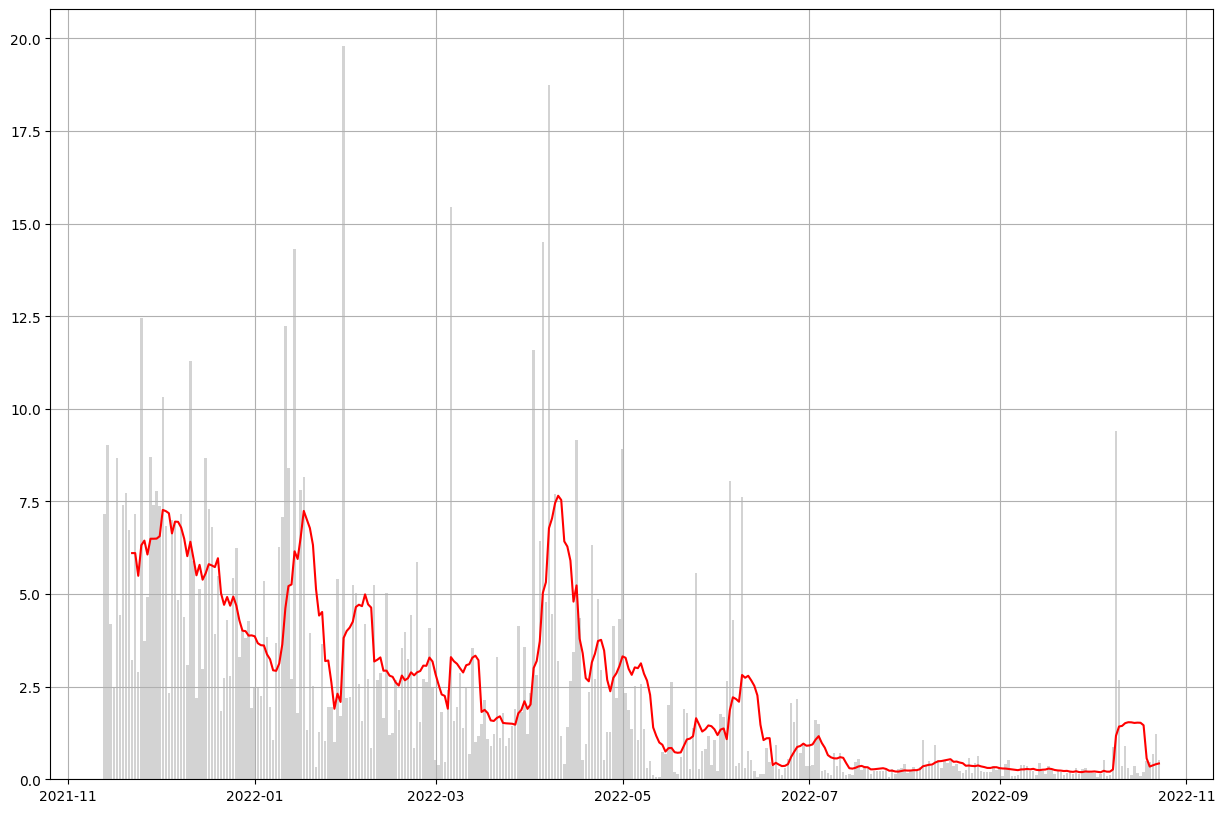

In [15]:
plt.bar(reinvestment_df.date,reinvestment_df.days_to_pay_reinvestment,color='lightgrey')
plt.plot(reinvestment_df.date,reinvestment_df.days_to_pay_reinvestment.rolling(10).mean(),color='red')
_=plt.grid()

In [16]:
# Q1 ANSWER: YES. FEES EARNED ARE HIGH ENOUGH RELATIVE TO TRANSACTIONS TO MERIT REINVESTMENT 

In [17]:
# GIVEN: REINVESTMENT SHOULD BE PROFITABLE IF EXPECTED RETURNS ON REINVESTED CAPITAL IS GREATER THAN THE COST 
#     OF REINVESTMENT

# QUESTION 2: ARE POOL RETURNS PREDICTABLE ENOUGH TO HAVE A BELIEVABLE "EPECTED RETURN" VALUE?

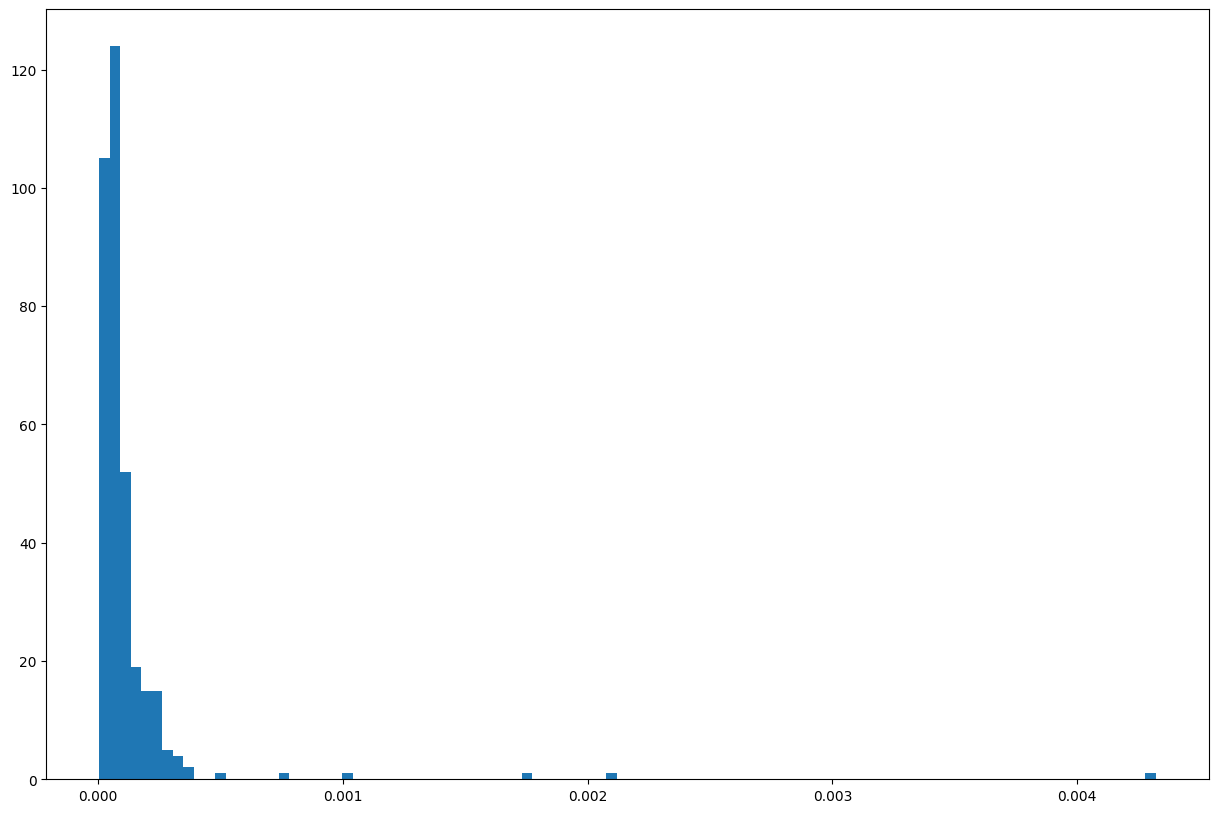

In [18]:
_=plt.hist(pool.returns,bins=100)

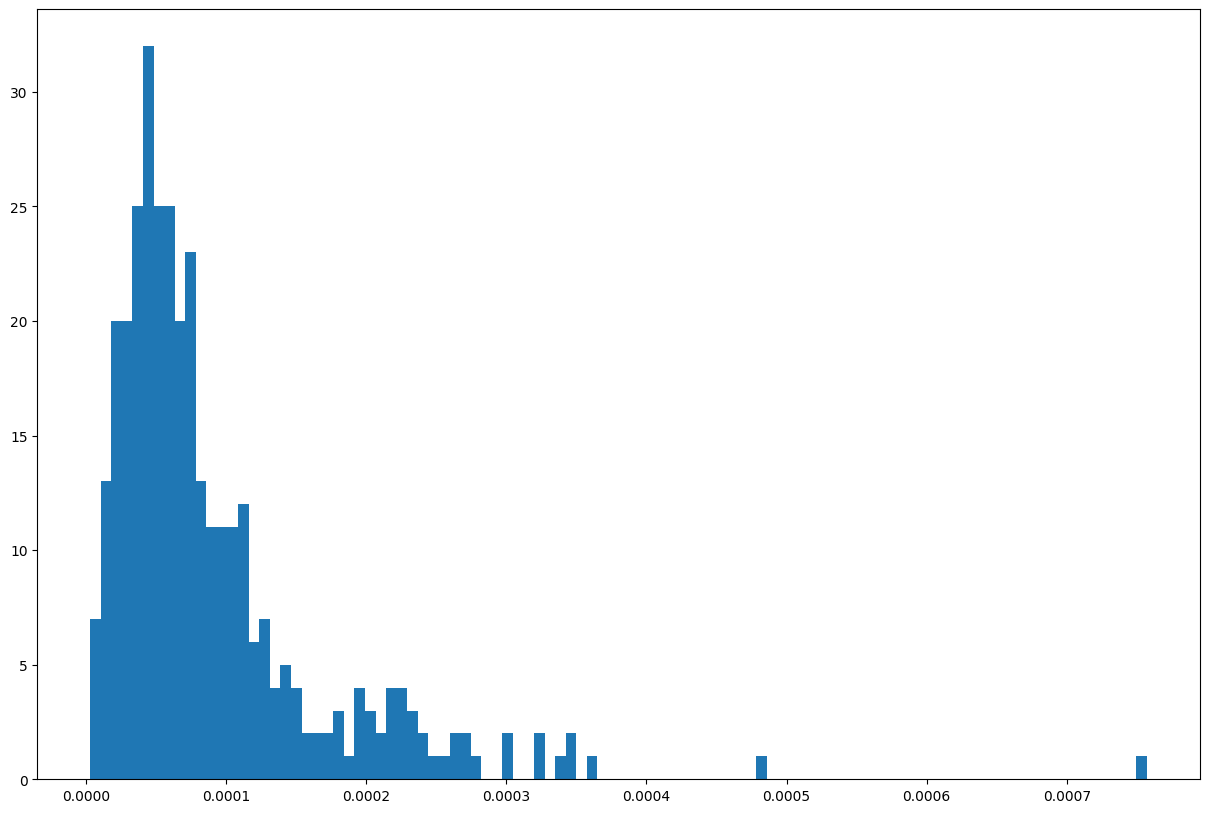

In [19]:
_=plt.hist(pool.returns.sort_values(ascending=True).iloc[:int(len(pool)*.99)],bins=100)

In [20]:
def fit_returns(sample,p_val,bin_count,plot):
    cut_off_sample=sample.sort_values(ascending=True).iloc[:int(len(sample)*(1-p_val))]

    bin_range=(0,cut_off_sample.max())

    fit=stats.skewnorm.fit(cut_off_sample)
    pdf_x=np.linspace(start=bin_range[0],stop=bin_range[1],num=bin_count)
    pdf=stats.skewnorm.pdf(a=fit[0],loc=fit[1],scale=fit[2],x=pdf_x)

    hist_output=plot.hist(cut_off_sample,bins=bin_count,color='lightgrey',range=bin_range,label='sample')
    plot.plot(pdf_x,pdf*hist_output[0].sum()/pdf.sum(),color='red')

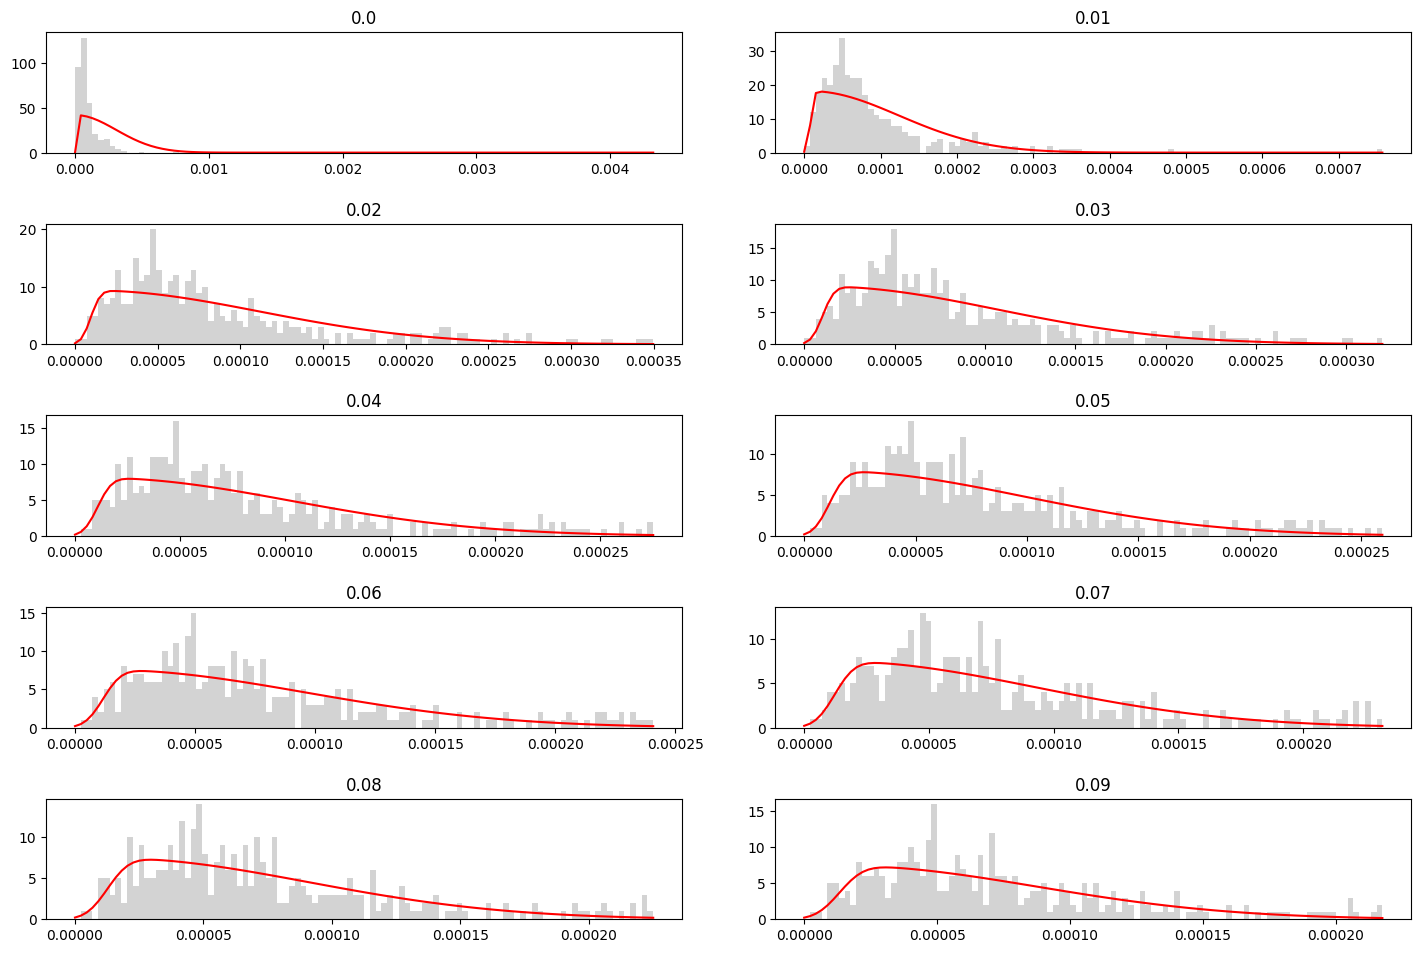

In [21]:
rows=5
cols=2
fig, plots=plt.subplots(rows,cols)
fig.tight_layout(pad=3)

count=0
p_vals=np.linspace(0,.09,10)
for row in np.arange(rows,dtype=int):
    for col in np.arange(cols,dtype=int):
        fit_returns(pool.returns,p_vals[count],100,plots[row][col])
        plots[row][col].set_title(p_vals[count])
        count=count+1

In [22]:
# Q2 ANSWER: YES. POOL RETURNS CAN BE GENERALLY DESCRIBED